### the breast cancer dataset is a classic and very easy binary classification dataset
- classes:2
- samples per class:212(Malignant),357(beningn) 
- malignant means a person has a chance of getting cancer in the future
- benign means a person has no chance of getting cancer
- samples total:569
- dimensionality:30
- Features: real, positive

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics

In [4]:
cancer= load_breast_cancer()
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [5]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
y=cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
x_trainc,x_testc,y_trainc,y_testc=train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=0)
cancerclf=LogisticRegression() # x=cancer.data, y=cancer.target
cancerclf.fit(x_trainc,y_trainc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred=cancerclf.predict(x_testc)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


In [27]:
score=cancerclf.score(x_trainc,y_trainc)
print(score)

0.957286432160804


In [28]:
cm=confusion_matrix(y_testc,y_pred)
print('confusion Matrix is:',cm,sep='\n')

confusion Matrix is:
[[ 62   1]
 [  5 103]]


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [30]:
probs=cancerclf.predict_proba(x_testc) 
probs 

array([[9.92878191e-01, 7.12180891e-03],
       [3.12766430e-02, 9.68723357e-01],
       [2.89333490e-03, 9.97106665e-01],
       [2.04062135e-01, 7.95937865e-01],
       [1.07906305e-04, 9.99892094e-01],
       [3.70831951e-03, 9.96291680e-01],
       [9.77419820e-03, 9.90225802e-01],
       [2.13201072e-03, 9.97867989e-01],
       [4.11221970e-02, 9.58877803e-01],
       [3.25615482e-04, 9.99674385e-01],
       [4.95858091e-01, 5.04141909e-01],
       [1.56083311e-01, 8.43916689e-01],
       [5.24199530e-03, 9.94758005e-01],
       [7.73938945e-01, 2.26061055e-01],
       [2.55475129e-01, 7.44524871e-01],
       [9.91080966e-01, 8.91903365e-03],
       [2.16624046e-02, 9.78337595e-01],
       [9.99999996e-01, 4.37954900e-09],
       [9.98287991e-01, 1.71200887e-03],
       [1.00000000e+00, 8.61266952e-12],
       [9.99971636e-01, 2.83644503e-05],
       [9.13270418e-01, 8.67295822e-02],
       [2.17738324e-03, 9.97822617e-01],
       [1.36829868e-02, 9.86317013e-01],
       [9.909652

In [32]:
from sklearn import metrics
prob_positive=probs[:,1] 
fpr, tpr, threshold=metrics.roc_curve(y_testc,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)


Area under the curve: 0.9961787184009406


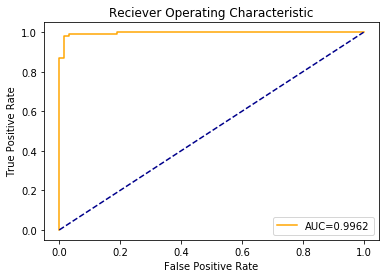

In [34]:
import matplotlib.pyplot as plt
plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## changing probability treshold

In [37]:
mythreshold=0.3 # greater than 30%, person has a chance of getting cancer
new_probs=(cancerclf.predict_proba(x_testc) >= mythreshold).astype(int)
#new probability

In [38]:
prob_positive=new_probs[:,1] 
fpr, tpr, threshold=metrics.roc_curve(y_testc,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
cm=confusion_matrix(y_testc,prob_positive)
print('confusion Matrix is:',cm,sep='\n')
print('Area under the curve:',roc_auc)


confusion Matrix is:
[[ 62   1]
 [  2 106]]
Area under the curve: 0.9828042328042328
